In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Ground():
    def __init__(self,
                 cohesion=0.0001040 * 1e6,
                 K=0.001,
                 shear_resistance_angle=20/180.*2*np.pi,
                 mu_t=0.65,
                 g=9.81,
                 fr=0.6,
                 friction_coefficient=0.1):
        self.cohesion = cohesion  # [Pa]
        self.K = K  # [m]
        self.shear_resistance_angle = shear_resistance_angle  # [rad]
        self.mu_t = mu_t
        self.g = g
        self.fr = fr
        self.friction_coefficient = friction_coefficient

In [4]:
class GroundMap:
    def __init__(self, width=4, height=4, size=2) -> None:
        self.width = width
        self.height = height
        self.size = size

        np.random.seed(13)

        # Initialize the map with Ground objects
        self.map = [[Ground(friction_coefficient=0.05+np.random.random()*0.15)
                     for _ in range(0, width, size)] for _ in range(0, height, size)]
        # self.map = [[Ground(friction_coefficient=0.08)
        #              for _ in range(width)] for _ in range(height)]

        # Calculate the coordinate range
        self.x_min = -width / 2
        self.x_max = width / 2
        self.y_min = -height / 2
        self.y_max = height / 2

        self.i_max = (height // size) - 1
        self.j_max = (width // size) - 1

    def coords_to_index(self, x, y):

        # Convert coordinates to indices
        grid_x = int(np.clip(x - self.x_min / self.size, 0, self.j_max))
        grid_y = int(np.clip(y - self.y_min / self.size, 0, self.i_max))
        # grid_y = int(np.clip(self.y_max - y, 0, self.height-1))

        return grid_y, grid_x

    def get_ground(self, x, y):

        grid_y, grid_x = self.coords_to_index(x, y)
        return self.map[grid_y][grid_x]

In [5]:
groundMap = GroundMap(11,11,3)

In [6]:
groundMap.map

[[<__main__.Ground at 0x7b6c4413d9d0>,

In [7]:
for i in range(groundMap.i_max+1):
    for j in range(groundMap.j_max+1):
        print(i,j,groundMap.map[i][j].friction_coefficient)

0 0 0.16665536158607303
0 1 0.08563118300523684
0 2 0.17364177989920526
1 0 0.19589016708573398
1 1 0.11801738711259682
1 2 0.1413563694141917
2 0 0.14624200171386037
2 1 0.15830273442754206
2 2 0.0552554786152156


In [8]:
groundMap.x_min,groundMap.x_max,

(-5.5, 5.5)

In [9]:
groundMap.coords_to_index(3,0)

(1, 2)

In [10]:
friction_coeff_matrix = np.array([[groundMap.map[i][j].friction_coefficient for j in range(groundMap.j_max+1)] for i in range(groundMap.i_max+1)])

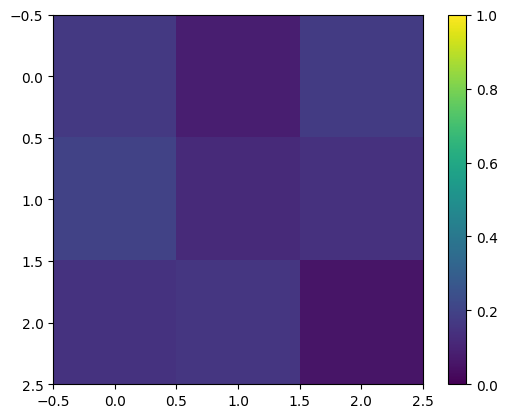

In [11]:
plt.imshow(friction_coeff_matrix, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [12]:
groundMap.coords_to_index(10, 10)

(2, 2)

In [13]:
groundMap.get_ground(-2,2).friction_coefficient

0.14624200171386037